## Import Data

In [1]:
import pandas as pd
import numpy as np
import re
# install NLTK
import nltk
#nltk.download()

In [2]:
data = pd.read_excel('Combined_News_DJIA.xls')

In [3]:
data.shape

(1989, 27)

In [4]:
data.head(277)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"""Georgia 'downs two Russian warplanes' as cou...",'BREAKING: Musharraf to be impeached.','Russia Today: Columns of troops roll into So...,'Russian tanks are moving towards the capital...,"""Afghan children raped with 'impunity,' U.N. ...",'150 Russian tanks have entered South Ossetia...,"""Breaking: Georgia invades South Ossetia, Rus...","""The 'enemy combatent' trials are nothing but...",...,'Georgia Invades South Ossetia - if Russia ge...,'Al-Qaeda Faces Islamist Backlash',"'Condoleezza Rice: ""The US would not act to p...",'This is a busy day: The European Union has ...,"""Georgia will withdraw 1,000 soldiers from Ir...",'Why the Pentagon Thinks Attacking Iran is a ...,'Caucasus in crisis: Georgia invades South Os...,'Indian shoe manufactory - And again in a se...,'Visitors Suffering from Mental Illnesses Ban...,"""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,'Why wont America and Nato help us? If they w...,'Bush puts foot down on Georgian conflict',"""Jewish Georgian minister: Thanks to Israeli ...",'Georgian army flees in disarray as Russians ...,"""Olympic opening ceremony fireworks 'faked'""",'What were the Mossad with fraudulent New Zea...,'Russia angered by Israeli military sale to G...,'An American citizen living in S.Ossetia blam...,...,'Israel and the US behind the Georgian aggres...,"'""Do not believe TV, neither Russian nor Geor...",'Riots are still going on in Montreal (Canada...,'China to overtake US as largest manufacturer','War in South Ossetia [PICS]','Israeli Physicians Group Condemns State Tort...,' Russia has just beaten the United States ov...,'Perhaps *the* question about the Georgia - R...,'Russia is so much better at war',"""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,'Remember that adorable 9-year-old who sang a...,"""Russia 'ends Georgia operation'""","'""If we had no sexual harassment we would hav...","""Al-Qa'eda is losing support in Iraq because ...",'Ceasefire in Georgia: Putin Outmaneuvers the...,'Why Microsoft and Intel tried to kill the XO...,'Stratfor: The Russo-Georgian War and the Bal...,"""I'm Trying to Get a Sense of This Whole Geor...",...,'U.S. troops still in Georgia (did you know t...,'Why Russias response to Georgia was right',"'Gorbachev accuses U.S. of making a ""serious ...","'Russia, Georgia, and NATO: Cold War Two'",'Remember that adorable 62-year-old who led y...,'War in Georgia: The Israeli connection','All signs point to the US encouraging Georgi...,'Christopher King argues that the US and NATO...,'America: The New Mexico?',"""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,' U.S. refuses Israel weapons to attack Iran:...,"""When the president ordered to attack Tskhinv...",' Israel clears troops who killed Reuters cam...,'Britain\'s policy of being tough on drugs is...,'Body of 14 year old found in trunk; Latest (...,'China has moved 10 *million* quake survivors...,"""Bush announces Operation Get All Up In Russi...",'Russian forces sink Georgian ships ',...,'Elephants extinct by 2020?','US humanitarian missions soon in Georgia - i...,"""Georgia's DDOS came from US sources""","'Russian convoy heads into Georgia, violating...",'Israeli defence minister: US against strike ...,'Gorbachev: We Had No Choice','Witness: Russian forces head towards Tbilisi...,' Quarter of Russians blame U.S. for conflict...,'Georgian president says US military will ta...,'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,'All the experts admit that we should legalis...,'War in South Osetia - 89 pictures made by a ...,'Swedish wrestler Ara Abrahamian throws away ...,'Russia exaggerated the death toll in South O...,'Missile That Killed 9 Inside Pakistan May Ha...,"""Rushdie Condemns Random House's Refusal to P...",'Poland and US agree to missle defense deal. ...,"'Will the Russians conquer Tblisi? Bet on it,...",

In [5]:
data['text'] = data['Top1'] +  data['Top2'] + data['Top3'] + data['Top4'] + data['Top5'] + data['Top6'] + data['Top7'] + data['Top8'] + data['Top9'] + data['Top10'] + data['Top11'] + data['Top12'] + data['Top13'] + data['Top14'] + data['Top15'] + data['Top16'] + data['Top17'] + data['Top18'] + data['Top19'] + data['Top20'] + data['Top21'] + data['Top22'] + data['Top23'] + data['Top24'] + data['Top25']

In [6]:
data['text']

0        "Georgia 'downs two Russian warplanes' as cou...
1        'Why wont America and Nato help us? If they w...
2        'Remember that adorable 9-year-old who sang a...
3        ' U.S. refuses Israel weapons to attack Iran:...
4        'All the experts admit that we should legalis...
                              ...                        
1984    Barclays and RBS shares suspended from trading...
1985    2,500 Scientists To Australia: If You Want To ...
1986    Explosion At Airport In IstanbulYemeni former ...
1987    Jamaica proposes marijuana dispensers for tour...
1988    A 117-year-old woman in Mexico City finally re...
Name: text, Length: 1989, dtype: object

## Text Preprocessing

In [7]:
list_rows = []

In [8]:
for index, row in data.iterrows():
    # split into words by white space
    words = row['text'].split()
    
    # remove punctuation from each word
    import string
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in words]
    
    # convert to lower case
    stripped = [word.lower() for word in stripped]
    
    # Filter out stop words
    from nltk.corpus import stopwords
    stopwords = set(stopwords.words('english'))
    removed_stop_words = [w for w in stripped if not w in stopwords]
    
    # remove remaining tokens that are not alphabetic
    words = [word for word in removed_stop_words if word.isalpha()]
    
    # Stemming of words
    from nltk.stem.porter import PorterStemmer
    porter = PorterStemmer()
    stemmed = [porter.stem(word) for word in words]
    list_rows.append(stemmed)

In [9]:
data['clean'] = list_rows
data

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,text,clean
0,2008-08-08,0,"""Georgia 'downs two Russian warplanes' as cou...",'BREAKING: Musharraf to be impeached.','Russia Today: Columns of troops roll into So...,'Russian tanks are moving towards the capital...,"""Afghan children raped with 'impunity,' U.N. ...",'150 Russian tanks have entered South Ossetia...,"""Breaking: Georgia invades South Ossetia, Rus...","""The 'enemy combatent' trials are nothing but...",...,"'Condoleezza Rice: ""The US would not act to p...",'This is a busy day: The European Union has ...,"""Georgia will withdraw 1,000 soldiers from Ir...",'Why the Pentagon Thinks Attacking Iran is a ...,'Caucasus in crisis: Georgia invades South Os...,'Indian shoe manufactory - And again in a se...,'Visitors Suffering from Mental Illnesses Ban...,"""No Help for Mexico's Kidnapping Surge""","""Georgia 'downs two Russian warplanes' as cou...","[georgia, down, two, russian, warplan, countri..."
1,2008-08-11,1,'Why wont America and Nato help us? If they w...,'Bush puts foot down on Georgian conflict',"""Jewish Georgian minister: Thanks to Israeli ...",'Georgian army flees in disarray as Russians ...,"""Olympic opening ceremony fireworks 'faked'""",'What were the Mossad with fraudulent New Zea...,'Russia angered by Israeli military sale to G...,'An American citizen living in S.Ossetia blam...,...,'Riots are still going on in Montreal (Canada...,'China to overtake US as largest manufacturer','War in South Ossetia [PICS]','Israeli Physicians Group Condemns State Tort...,' Russia has just beaten the United States ov...,'Perhaps *the* question about the Georgia - R...,'Russia is so much better at war',"""So this is what it's come to: trading sex fo...",'Why wont America and Nato help us? If they w...,"[wont, america, nato, help, us, wont, help, us..."
2,2008-08-12,0,'Remember that adorable 9-year-old who sang a...,"""Russia 'ends Georgia operation'""","'""If we had no sexual harassment we would hav...","""Al-Qa'eda is losing support in Iraq because ...",'Ceasefire in Georgia: Putin Outmaneuvers the...,'Why Microsoft and Intel tried to kill the XO...,'Stratfor: The Russo-Georgian War and the Bal...,"""I'm Trying to Get a Sense of This Whole Geor...",...,"'Gorbachev accuses U.S. of making a ""serious ...","'Russia, Georgia, and NATO: Cold War Two'",'Remember that adorable 62-year-old who led y...,'War in Georgia: The Israeli connection','All signs point to the US encouraging Georgi...,'Christopher King argues that the US and NATO...,'America: The New Mexico?',"""BBC NEWS | Asia-Pacific | Extinction 'by man...",'Remember that adorable 9-year-old who sang a...,"[rememb, ador, sang, open, ceremoni, fake, rus..."
3,2008-08-13,0,' U.S. refuses Israel weapons to attack Iran:...,"""When the president ordered to attack Tskhinv...",' Israel clears troops who killed Reuters cam...,'Britain\'s policy of being tough on drugs is...,'Body of 14 year old found in trunk; Latest (...,'China has moved 10 *million* quake survivors...,"""Bush announces Operation Get All Up In Russi...",'Russian forces sink Georgian ships ',...,"""Georgia's DDOS came from US sources""","'Russian convoy heads into Georgia, violating...",'Israeli defence minister: US against strike ...,'Gorbachev: We Had No Choice','Witness: Russian forces head towards Tbilisi...,' Quarter of Russians blame U.S. for conflict...,'Georgian president says US military will ta...,'2006: Nobel laureate Aleksander Solzhenitsyn...,' U.S. refuses Israel weapons to attack Iran:...,"[us, refus, israel, weapon, attack, iran, repo..."
4,2008-08-14,1,'All the experts admit that we should legalis...,'War in South Osetia - 89 pictures made by a ...,'Swedish wrestler Ara Abrahamian throws away ...,'Russia exaggerated the death toll in South O...,'Missile That Killed 9 Inside Pakistan May Ha...,"""Rushdie Condemns Random House's Refusal to P...",'Poland and US agree to missle defense deal. ...,"

In [87]:
# data.to_excel('cleaned_news.xls')

## Sentiment Analysis 

In [10]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['text'].apply(pol)
data['subjectivity'] = data['text'].apply(sub)
data

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top20,Top21,Top22,Top23,Top24,Top25,text,clean,polarity,subjectivity
0,2008-08-08,0,"""Georgia 'downs two Russian warplanes' as cou...",'BREAKING: Musharraf to be impeached.','Russia Today: Columns of troops roll into So...,'Russian tanks are moving towards the capital...,"""Afghan children raped with 'impunity,' U.N. ...",'150 Russian tanks have entered South Ossetia...,"""Breaking: Georgia invades South Ossetia, Rus...","""The 'enemy combatent' trials are nothing but...",...,"""Georgia will withdraw 1,000 soldiers from Ir...",'Why the Pentagon Thinks Attacking Iran is a ...,'Caucasus in crisis: Georgia invades South Os...,'Indian shoe manufactory - And again in a se...,'Visitors Suffering from Mental Illnesses Ban...,"""No Help for Mexico's Kidnapping Surge""","""Georgia 'downs two Russian warplanes' as cou...","[georgia, down, two, russian, warplan, countri...",-0.048568,0.267549
1,2008-08-11,1,'Why wont America and Nato help us? If they w...,'Bush puts foot down on Georgian conflict',"""Jewish Georgian minister: Thanks to Israeli ...",'Georgian army flees in disarray as Russians ...,"""Olympic opening ceremony fireworks 'faked'""",'What were the Mossad with fraudulent New Zea...,'Russia angered by Israeli military sale to G...,'An American citizen living in S.Ossetia blam...,...,'War in South Ossetia [PICS]','Israeli Physicians Group Condemns State Tort...,' Russia has just beaten the United States ov...,'Perhaps *the* question about the Georgia - R...,'Russia is so much better at war',"""So this is what it's come to: trading sex fo...",'Why wont America and Nato help us? If they w...,"[wont, america, nato, help, us, wont, help, us...",0.121956,0.374806
2,2008-08-12,0,'Remember that adorable 9-year-old who sang a...,"""Russia 'ends Georgia operation'""","'""If we had no sexual harassment we would hav...","""Al-Qa'eda is losing support in Iraq because ...",'Ceasefire in Georgia: Putin Outmaneuvers the...,'Why Microsoft and Intel tried to kill the XO...,'Stratfor: The Russo-Georgian War and the Bal...,"""I'm Trying to Get a Sense of This Whole Geor...",...,'Remember that adorable 62-year-old who led y...,'War in Georgia: The Israeli connection','All signs point to the US encouraging Georgi...,'Christopher King argues that the US and NATO...,'America: The New Mexico?',"""BBC NEWS | Asia-Pacific | Extinction 'by man...",'Remember that adorable 9-year-old who sang a...,"[rememb, ador, sang, open, ceremoni, fake, rus...",-0.046530,0.518785
3,2008-08-13,0,' U.S. refuses Israel weapons to attack Iran:...,"""When the president ordered to attack Tskhinv...",' Israel clears troops who killed Reuters cam...,'Britain\'s policy of being tough on drugs is...,'Body of 14 year old found in trunk; Latest (...,'China has moved 10 *million* quake survivors...,"""Bush announces Operation Get All Up In Russi...",'Russian forces sink Georgian ships ',...,'Israeli defence minister: US against strike ...,'Gorbachev: We Had No Choice','Witness: Russian forces head towards Tbilisi...,' Quarter of Russians blame U.S. for conflict...,'Georgian president says US military will ta...,'2006: Nobel laureate Aleksander Solzhenitsyn...,' U.S. refuses Israel weapons to attack Iran:...,"[us, refus, israel, weapon, attack, iran, repo...",0.011398,0.364021
4,2008-08-14,1,'All the experts admit that we should legalis...,'War in South Osetia - 89 pictures made by a ...,'Swedish wrestler Ara Abrahamian throws away ...,'Russia exaggerated the death toll in South O...,'Missile That Killed 9 Inside Pakistan May Ha...,"""Rushdie Condemns Random House's Refusal to P...",'Poland and US agree to missle defense deal. ...,"'Will the Russians conquer Tblisi? Bet on it,...",...,'Georgian TV reporter shot by Russian sniper ...,'Saudi Arabia: Mother moves to block child ma...,'Taliban wages war on humanitarian aid workers',"'Russia: World ""can forget about"" Georgia\'s...",'Darfur rebels accuse Sudan of mounting major...,

/Users/yanzihao/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


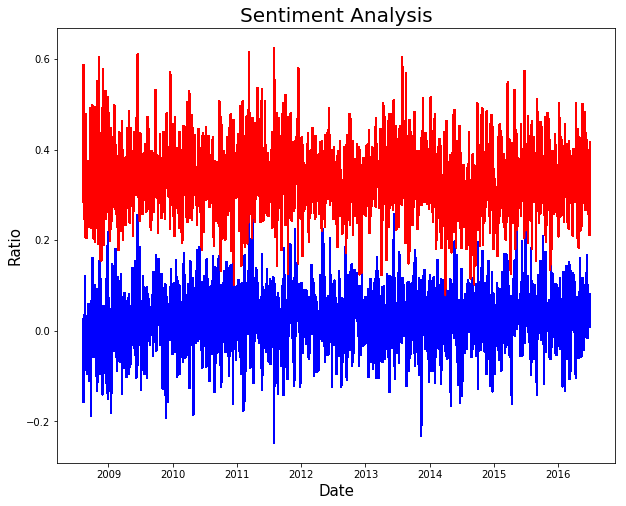

In [49]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, date in enumerate(data.index):
    x = data['Date']
    y_polarity = data['polarity']
    y_subjectivity = data['subjectivity']
    plt.plot(x, y_polarity, color='blue')
    plt.plot(x, y_subjectivity, color='red')
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Ratio', fontsize=15)

plt.show()

## Topic Modeling - Latent Dirichlet Allocation (LDA)

In [136]:
# Create a function to pull out nouns or adj from a string of text
from nltk import word_tokenize, pos_tag

def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

In [138]:
# Apply the nouns_adj function to the transcripts to filter only on nouns
data_nouns_adj = data['text'].apply(nouns_adj)
data_nouns_adj

0       Georgia Russian warplanes countries war 'BREAK...
1       wont America Nato Iraq Georgian conflict Jewis...
2       adorable 9-year-old opening ceremonies fake Ru...
3       U.S. Israel weapons Iran report president Tskh...
4       experts drugs 'War South Osetia pictures Russi...
                              ...                        
1984    Barclays RBS shares trading more % Pope Church...
1985    Scientists Australia Great Barrier Reef Stop C...
1986    Explosion Airport IstanbulYemeni former presid...
1987    Jamaica dispensers tourists airports legalisat...
1988    117-year-old woman Mexico City birth certifica...
Name: text, Length: 1989, dtype: object

In [79]:
# Import the necessary modules for LDA with gensim
# Terminal / Anaconda Navigator: conda install -c conda-forge gensim
from gensim import matutils, models
import scipy.sparse

In [183]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said','new',
                  'say','says','said','first','second','will','year','years','now','one','may','just']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cvna = CountVectorizer(stop_words=stop_words, max_df=.8)
data_cvna = cvna.fit_transform(data_nouns_adj)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adj.index
data_dtmna

# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [184]:
# Try 20 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=20, id2word=id2wordna, passes=200)
ldana.print_topics()

[(0,
  '0.008*"libya" + 0.004*"libyan" + 0.003*"gaddafi" + 0.003*"egypt" + 0.002*"protesters" + 0.002*"assange" + 0.002*"snowden" + 0.001*"alawite" + 0.001*"bahrain" + 0.001*"bees"'),
 (1,
  '0.003*"murdoch" + 0.003*"amp" + 0.002*"news" + 0.002*"greece" + 0.001*"solar" + 0.001*"chinese" + 0.001*"hacking" + 0.001*"benedict" + 0.001*"island" + 0.001*"anonymous"'),
 (2,
  '0.007*"israel" + 0.006*"world" + 0.006*"government" + 0.005*"police" + 0.005*"war" + 0.005*"china" + 0.005*"israeli" + 0.004*"korea" + 0.004*"president" + 0.003*"iran"'),
 (3,
  '0.004*"amp" + 0.002*"china" + 0.002*"air" + 0.002*"boston" + 0.001*"syria" + 0.001*"isis" + 0.001*"marathon" + 0.001*"hitler" + 0.001*"japan" + 0.001*"japanese"'),
 (4,
  '0.013*"ukraine" + 0.011*"russia" + 0.009*"russian" + 0.005*"crimea" + 0.004*"ukrainian" + 0.004*"world" + 0.004*"military" + 0.003*"korea" + 0.003*"putin" + 0.003*"south"'),
 (5,
  '0.001*"network" + 0.001*"foley" + 0.001*"reach" + 0.001*"aide" + 0.001*"copper" + 0.001*"schoo

## Visualizing the models with pyLDAvis 

In [192]:
from sklearn.decomposition import LatentDirichletAllocation
lda_tf = LatentDirichletAllocation(n_components=20,random_state=0)
lda_tf.fit(data_cvna)

import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_tf, data_cvna, cvna)

/Users/yanzihao/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.155108 -0.015222       1        1  20.902748
19    -0.105494  0.001331       2        1   9.985317
18    -0.109629  0.008838       3        1   9.444846
4     -0.089742  0.000137       4        1   7.452269
0     -0.084250 -0.000627       5        1   7.020240
9     -0.091440 -0.003840       6        1   6.630907
15    -0.082749 -0.004543       7        1   6.026365
11    -0.074238 -0.006316       8        1   5.471937
2     -0.076276 -0.000574       9        1   5.459331
14    -0.071079  0.006743      10        1   4.978430
17    -0.067155 -0.017164      11        1   4.460437
6     -0.040432  0.002809      12        1   3.275489
7     -0.033685  0.013678      13        1   2.995833
10     0.016962  0.023856      14        1   1.835663
12     0.070041  0.065315      15        1   1.240032
1      0.131741 -0.171098      16        1   0.943618
13     0.145956  0.056694      17        1   0.719464
16     0.164342  0.041130      18        1   0.635021
3      0.269240 -0.016046      19        1   0.266116
5      0.282997  0.014899      20        1   0.255936, topic_info=      Category         Freq           Term        Total  loglift  logprob
12975  Default   401.000000          egypt   401.000000  30.0000  30.0000
17114  Default  1843.000000     government  1843.000000  29.0000  29.0000
12997  Default   216.000000       egyptian   216.000000  28.0000  28.0000
35577  Default   917.000000        russian   917.000000  27.0000  27.0000
32561  Default   387.000000       protests   387.000000  26.0000  26.0000
...        ...          ...            ...          ...      ...      ...
11135  Topic20     0.685108  demonstrators    59.871170   1.4976  -7.3217
31845  Topic20     0.675236       presence    45.588723   1.7556  -7.3362
16077  Topic20     0.641760             ft    14.392895   2.8577  -7.3871
19630  Topic20     0.641760         immune    14.078125   2.8798  -7.3871
13220  Topic20     0.641760  embarrassment     8.651023   3.3668  -7.3871

[1782 rows x 6 columns], token_table=       Topic      Freq  Term
term                        
0          1  0.127064   000
0          2  0.118593   000
0          3  0.135535   000
0          4  0.203303   000
0          5  0.110122   000
...      ...       ...   ...
46438     10  0.030685  zika
46438     11  0.061371  zika
46438     12  0.122742  zika
46438     16  0.030685  zika
46441     14  0.889054   zim

[6227 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 20, 19, 5, 1, 10, 16, 12, 3, 15, 18, 7, 8, 11, 13, 2, 14, 17, 4, 6])

## TF-IDF Vectorizing (Not related to this project, just for recording)

### Use cleaned text

In [13]:
# https://www.kaggle.com/ndrewgele/omg-nlp-with-the-djia-and-reddit
train_word = []
for row in range(0,len(train.index)):
    train_word.append(' '.join(str(x) for x in train.loc[row,'clean']))

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(use_idf = True) #We could still use ngram_range=(1,3)
X = vectorizer.fit_transform(train_word)

X[0]
X.shape

(1611, 47877)

In [ ]:
from sklearn.decomposition import TruncatedSVD

lsa = TruncatedSVD(n_components=1611, n_iter=100)
lsa.fit(X)

In [ ]:
terms = vectorizer.get_feature_names()
for i, comp in enumerate(lsa.components_):
    termsInComp = zip(terms, comp)
    sortedTerms = sorted(termsInComp, key=lambda x: x[1], reverse=True)[:10]
    print("Concept %d:" %i)
    for term in sortedTerms:
        print(term[0])
    print(" ")